In [153]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import json

In [154]:
NUM_KNAPSACKS = 3
NUM_ITEMS = 10
NUM_DIMENSIONS = 2
PENALTY = 100
MAX_ITER = 10000
MAX_STEPS = 10000
TEMPERATURE_START = 100
ALPHA = 0.99
NUM_NEIGHBORS = 1000


In [155]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(
    0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

In [156]:
def is_invalid(solution):
    for ks in range(NUM_KNAPSACKS):
        items_in_ks = np.where(solution == ks)[0]
        if len(items_in_ks) == 0:
            continue
        total_weight = WEIGHTS[items_in_ks].sum(axis=0)
        if np.any(total_weight > CONSTRAINTS[ks]):
            return True
    return False

In [157]:
def fitness(solution):
    return np.sum(VALUES[solution >= 0])

In [158]:
def random_tweak(solution):
    new_solution = solution.copy()
    index = np.random.randint(0, len(solution))
    new_val = np.random.randint(-1, NUM_KNAPSACKS)
    
    # change each time to a different value
    while new_val == solution[index]:
        new_val = np.random.randint(-1, NUM_KNAPSACKS)
    new_solution[index] = new_val
    
    return new_solution


In [159]:
def random_hill_climbing():
    current_solution = np.full(NUM_ITEMS, -1)
    current_cost = fitness(current_solution)

    history=[]
    for _ in tqdm(range(MAX_STEPS)):
        new_solution = random_tweak(current_solution)
        new_cost = fitness(new_solution)
        if not is_invalid(new_solution) and new_cost >= current_cost:
            current_solution = new_solution
            current_cost = new_cost
        history.append(current_cost)
    
    return current_solution, current_cost, history

In [160]:
def simulated_annealing():
    current_solution = np.full(NUM_ITEMS, -1)
    current_cost = fitness(current_solution)

    best_solution = current_solution
    best_cost = current_cost

    temperature = TEMPERATURE_START

    history=[]
    for steps in tqdm(range(MAX_STEPS)):

        new_solution = random_tweak(current_solution)
        new_cost = fitness(new_solution)
        
        if not is_invalid(new_solution):
            if new_cost >= current_cost:
                current_solution = new_solution
                current_cost = new_cost
                if new_cost > best_cost:
                    best_solution = new_solution
                    best_cost = new_cost
            else: 
                diff = new_cost - current_cost
                exponent = diff / temperature
                # acceptance probability through Boltzmann distribution
                acceptance_prob = np.exp(exponent)
                if np.random.rand() < acceptance_prob:
                    current_solution = new_solution
                    current_cost = new_cost
        # cool down
        temperature = temperature * ALPHA
        history.append(current_cost)
    return current_solution, current_cost, history

In [161]:
def steepest_ascent_hill_climbing():
    current_solution = np.full(NUM_ITEMS, -1)
    current_cost = fitness(current_solution)

    history=[]
    for _ in tqdm(range(MAX_STEPS)):
        best_neighbor = None
        best_cost = current_cost

        for _ in range(NUM_NEIGHBORS):
            new_solution = random_tweak(current_solution)
            new_cost = fitness(new_solution)

            if not is_invalid(new_solution) and new_cost > best_cost:
                best_cost = new_cost
                best_neighbor = new_solution
                
        if best_neighbor is None:
            break

        if best_neighbor is not None:
            current_solution = best_neighbor
            current_cost = best_cost

        history.append(current_cost)

    return current_solution, current_cost, history

In [162]:
def store_and_plot(hist_hc, hist_sa, hist_sahc):
    df = pd.DataFrame({
        'Random Hill Climbing': hist_hc,
        'Simulated Annealing': hist_sa
    })
    
    plt.plot(hist_hc, label='Random Hill Climbing')
    plt.axhline(np.sum(VALUES), color='red', linestyle='-', alpha=0.5, label="Maximum Possible Fitness")
    plt.xlabel('Steps')
    plt.ylabel('Fitness')
    plt.title('Fitness over Steps for RHC')
    plt.legend()
    plt.grid()
    plt.show()

    plt.plot(hist_sa, label='Simulated Annealing')
    plt.axhline(np.sum(VALUES), color='red', linestyle='-', alpha=0.5, label="Maximum Possible Fitness")
    plt.xlabel('Steps')
    plt.ylabel('Fitness')
    plt.title('Fitness over Steps for SA')
    plt.legend()
    plt.grid()
    plt.show()

    plt.plot(hist_sahc, label='Steepest Ascent Hill Climbing')
    plt.axhline(np.sum(VALUES), color='red', linestyle='-', alpha=0.5, label="Maximum Possible Fitness")
    plt.xlabel('Steps')
    plt.ylabel('Fitness')
    plt.title('Fitness over Steps for SAHC')
    plt.legend()
    plt.grid()
    plt.show()


  0%|          | 0/10000 [00:00<?, ?it/s]

Random Hill Climbing fitness: 1065


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulated Annealing fitness: 1065


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulated Steepest Ascent Hill Climbing: 1057


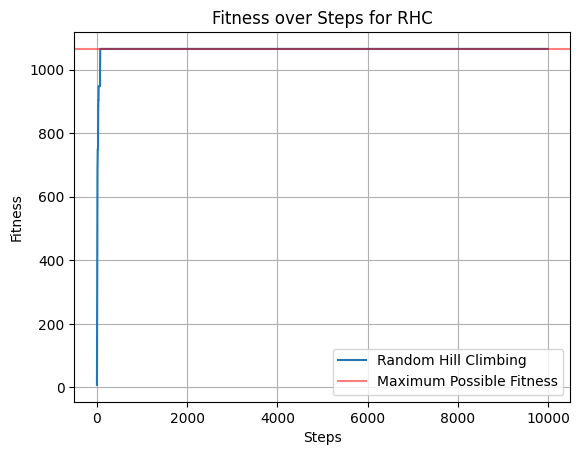

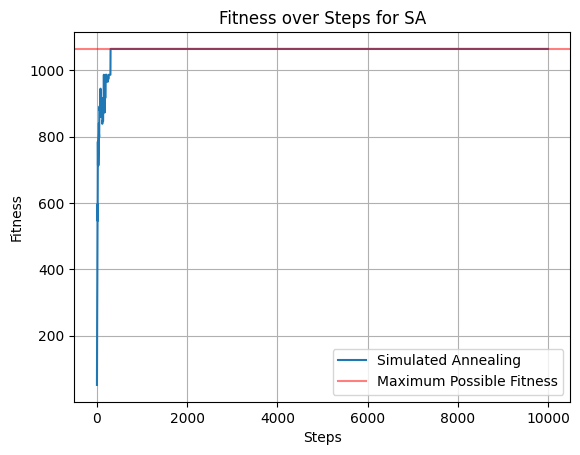

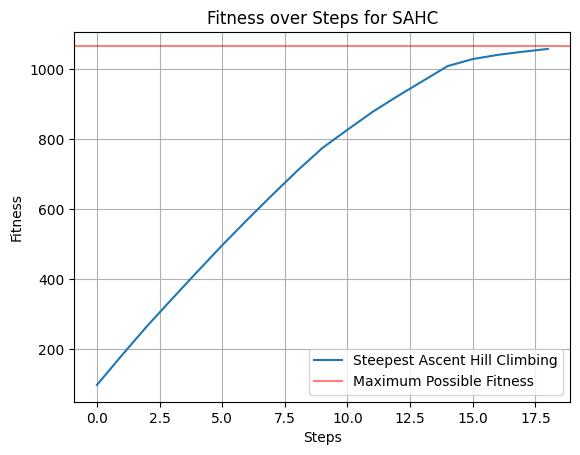

In [163]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

# potential solution as array of length NUM_ITEMS
# each index represents an item and the value at that index represents the knapsack to which the item is assigned (or -1 if unassigned)
solution_rh, fitness_rh, history_rh = random_hill_climbing()
print("Random Hill Climbing fitness:", fitness_rh)
solution_sa, fitness_sa, history_sa = simulated_annealing()
print("Simulated Annealing fitness:", fitness_sa)
solution_sahc, fitness_sahc, history_sahc = steepest_ascent_hill_climbing()
print("Simulated Steepest Ascent Hill Climbing:", fitness_sahc)


store_and_plot(history_rh, history_sa, history_sahc)




  0%|          | 0/10000 [00:00<?, ?it/s]

Random Hill Climbing fitness: 34939


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulated Annealing fitness: 41823


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulated Steepest Ascent Hill Climbing: 42115


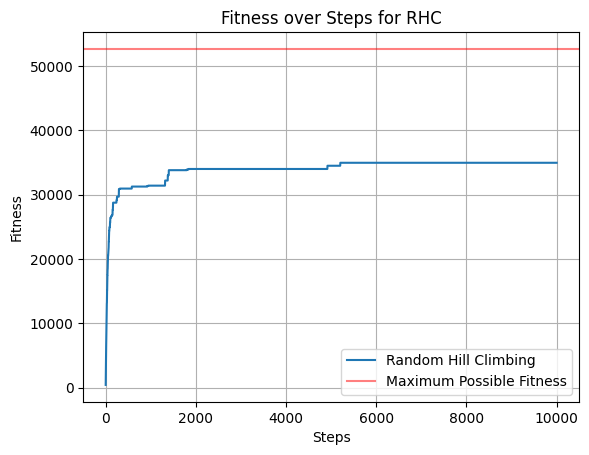

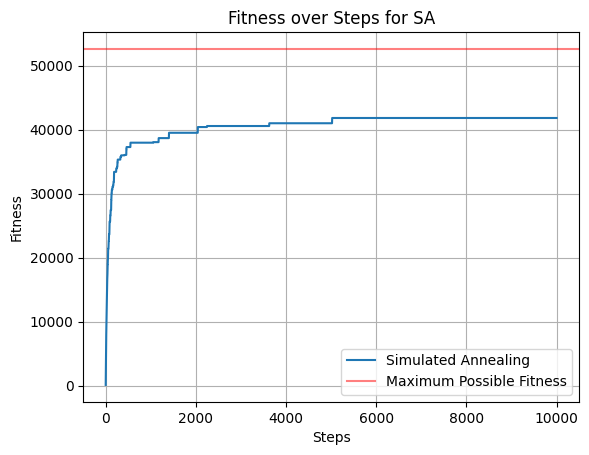

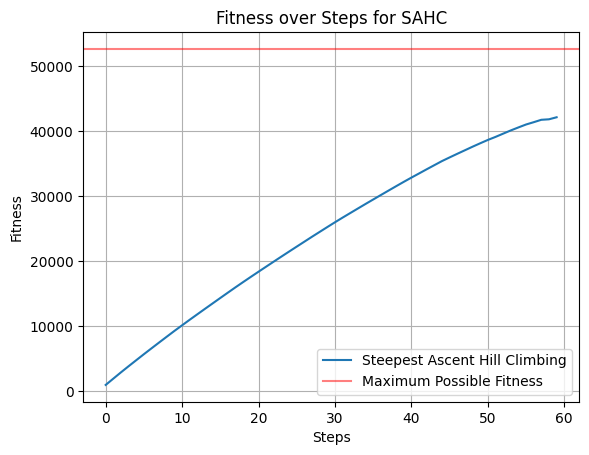

In [164]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS)
)

# potential solution as array of length NUM_ITEMS
# each index represents an item and the value at that index represents the knapsack to which the item is assigned (or -1 if unassigned)
solution_rh, fitness_rh, history_rh = random_hill_climbing()
print("Random Hill Climbing fitness:", fitness_rh)
solution_sa, fitness_sa, history_sa = simulated_annealing()
print("Simulated Annealing fitness:", fitness_sa)
solution_sahc, fitness_sahc, history_sahc = steepest_ascent_hill_climbing()
print("Simulated Steepest Ascent Hill Climbing:", fitness_sahc)


store_and_plot(history_rh, history_sa, history_sahc)




In [165]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(
    1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS))

# potential solution as array of length NUM_ITEMS
# each index represents an item and the value at that index represents the knapsack to which the item is assigned (or -1 if unassigned)
solution_rh, fitness_rh, history_rh = random_hill_climbing()
print("Random Hill Climbing fitness:", fitness_rh)
solution_sa, fitness_sa, history_sa = simulated_annealing()
print("Simulated Annealing fitness:", fitness_sa)
solution_sahc, fitness_sahc, history_sahc = steepest_ascent_hill_climbing()
print("Simulated Steepest Ascent Hill Climbing:", fitness_sahc)


store_and_plot(history_rh, history_sa, history_sahc)





  0%|          | 0/10000 [00:00<?, ?it/s]

Random Hill Climbing fitness: 1167565


  0%|          | 0/10000 [00:00<?, ?it/s]

Simulated Annealing fitness: 1153440


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 